In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 487.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/300.2 kB 1.0 MB/s eta 0:00:01
   ----------------------------------- ---- 266.2/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
df= pd.read_csv(r"C:\Users\HP\Downloads\omicron.csv")
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.465690e+18,Abaris,Hants,"Would appear on Blogger (did originally), but...",9/16/2009 14:30,2880,4369,26907,False,11/30/2021 14:45,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1.465690e+18,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,12/28/2019 14:29,165,583,21152,False,11/30/2021 14:43,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1.465690e+18,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,7/10/2021 9:40,114,393,2339,False,11/30/2021 14:32,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1.465690e+18,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,5/21/2009 8:32,20759,2321,739,False,11/30/2021 14:30,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1.465690e+18,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,12/31/2013 2:57,17134,8,31,False,11/30/2021 14:24,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False


In [13]:
df.isnull().sum()

id                      0
user_name               0
user_location       14788
user_description     3831
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            18370
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [17]:
df.shape

(66168, 16)

In [ ]:
#Stopwords are common words in a language that are often filtered out because they are considered to carry little meaning
#eg.a,is,are,me

In [14]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#That reduces words to their root or base form.

In [35]:

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)


In [36]:
data["text"].head()

0    skynew told id back omicron “odium medicum ins...
1                           someon told octob omicron 
2    glad see public schoolkid wrap  sign perman ps...
3    autom system becom increa complex effort test ...
4    🟢 u think omicron fud long📈🔴 u think omicron t...
Name: text, dtype: object

In [37]:
#the word cloud of the text column to look at the most number of words used by the people on their tweets:

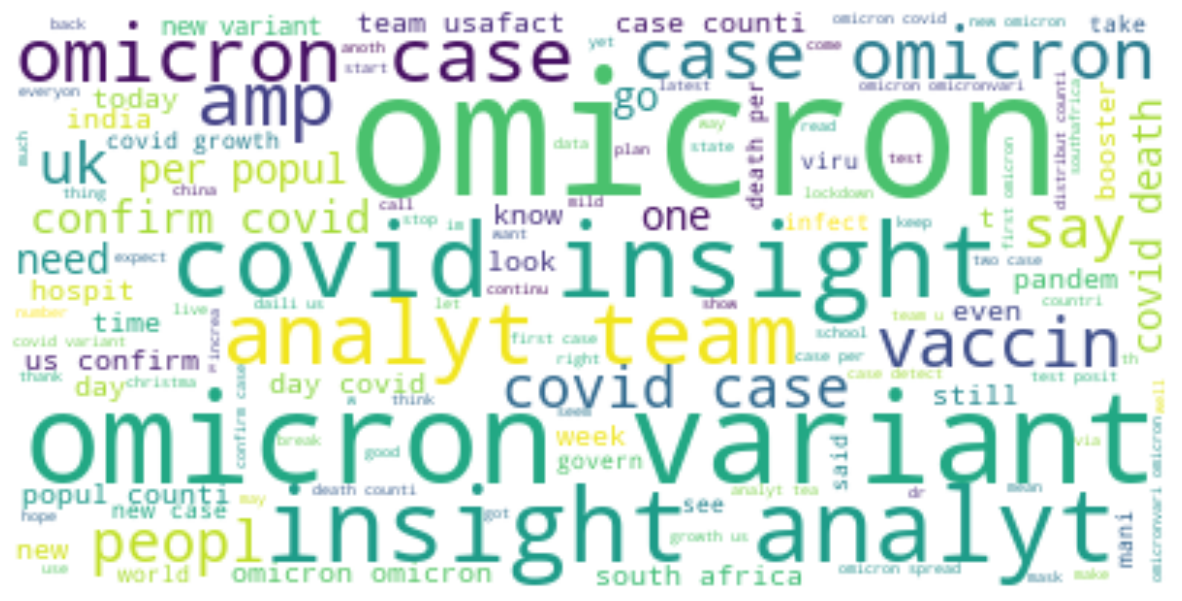

In [38]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
#the word cloud of the hashtags column to look at the most number of hashtags used by the people on their tweets:

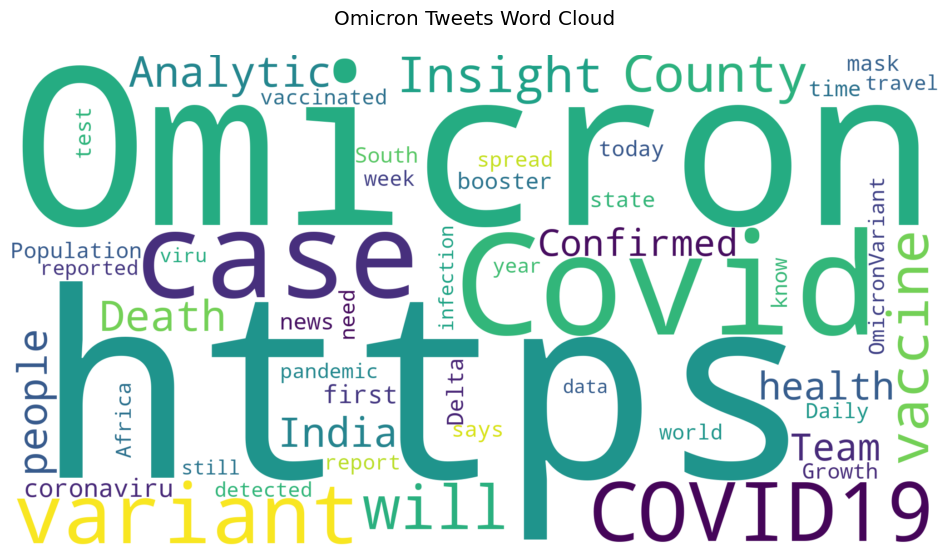

In [43]:
text = " ".join(tweet for tweet in df.text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=50, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Omicron Tweets Word Cloud\n', size='x-large')
plt.savefig('./omicron_wordcloud.jpg',dpi=720) # saving the image
plt.show()

In [48]:
#add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores 

In [49]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


                                                text  Positive  Negative  \
0  skynew told id back omicron “odium medicum ins...     0.171     0.000   
1                         someon told octob omicron      0.000     0.000   
2  glad see public schoolkid wrap  sign perman ps...     0.250     0.000   
3  autom system becom increa complex effort test ...     0.000     0.000   
4  🟢 u think omicron fud long📈🔴 u think omicron t...     0.000     0.379   

   Neutral  
0    0.829  
1    1.000  
2    0.750  
3    1.000  
4    0.621  


In [54]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊")
    elif (b>a) and (b>c):
        print("Negative 😤 ")
    else:
        print("Neutral  😐")
sentiment_score(x, y, z)

Neutral  😐


In [ ]:
# emoji copied from
#htps://emojipedia.org/neutral-face